<a href="https://colab.research.google.com/github/bargida/AI_codes/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error as mae,mean_squared_error as mse,mean_absolute_error as mae,root_mean_squared_error as rmse
import os

In [5]:
dataset = pd.read_csv("Customer.csv")

In [6]:
dataset.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    793 non-null    object
 1   Customer Name  793 non-null    object
 2   Segment        793 non-null    object
 3   Age            793 non-null    int64 
 4   Country        793 non-null    object
 5   City           793 non-null    object
 6   State          793 non-null    object
 7   Postal Code    793 non-null    int64 
 8   Region         793 non-null    object
dtypes: int64(2), object(7)
memory usage: 55.9+ KB


In [8]:
dataset.describe()

,Age,Postal Code
count,793.000000,793.000000
mean,44.467844,55229.717528
std,15.526673,31679.223816
min,18.000000,1841.000000
25%,31.000000,27217.000000
50%,45.000000,55901.000000
75%,58.000000,90004.000000
max,70.000000,99207.000000


In [9]:
dataset.isnull().sum().to_frame().rename(columns={0: 'Total No. of Missing Values'})

,Total No. of Missing Values
Customer ID,0
Customer Name,0
Segment,0
Age,0
Country,0
City,0
State,0
Postal Code,0
Region,0


In [10]:
print(f"Duplicte no of rows in dataset are {(dataset.duplicated().sum())}")

Duplicte no of rows in dataset are 0


In [11]:
colum_drop = ['Customer ID', 'Customer Name', 'Country']

In [12]:
data_cleaned = dataset.drop(columns=colum_drop)

In [13]:
correlation_matrix = data_cleaned.select_dtypes(include=np.number).corr()


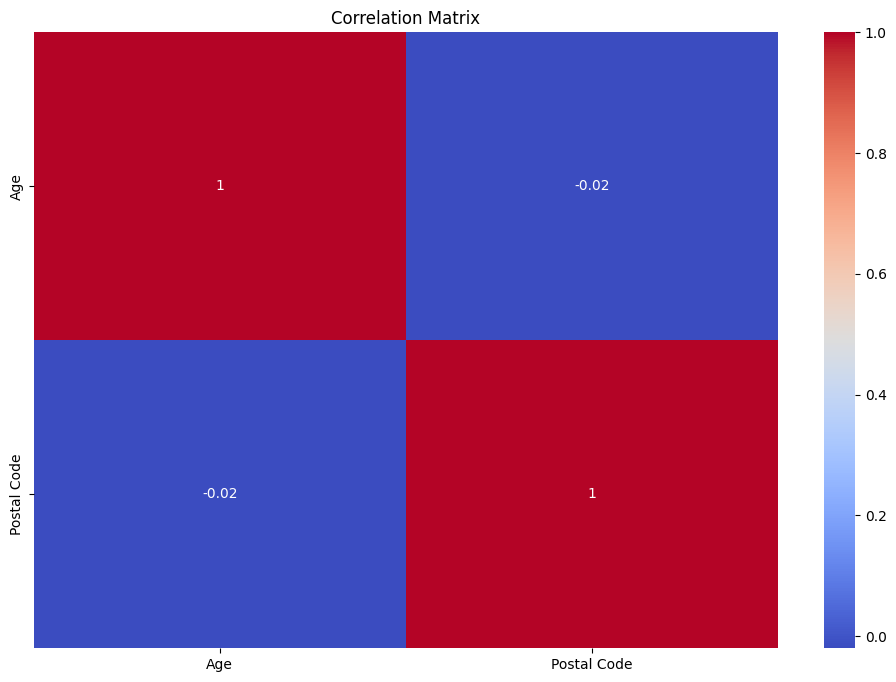

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


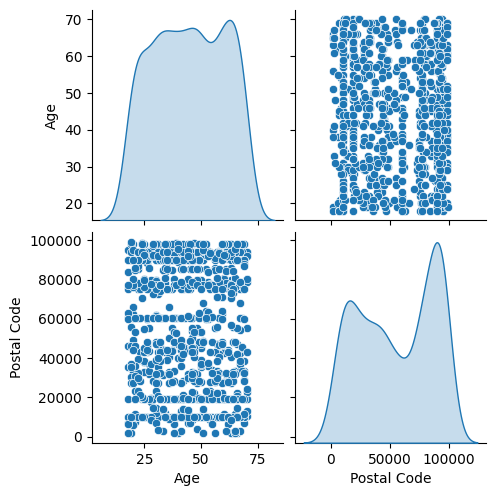

In [15]:
sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()

In [16]:
categorical_columns = ['Segment', 'City', 'State', 'Region']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

In [17]:
print("\nFirst 5 Rows of Cleaned Data:\n")
print(data_encoded.head())
data_encoded.to_csv('Cleaned_Customer_Data.csv', index=False)


First 5 Rows of Cleaned Data:

   Age  Postal Code  Segment_Corporate  Segment_Home Office  City_Albuquerque  \
0   67        42420              False                False             False   
1   31        90036               True                False             False   
2   65        33311              False                False             False   
3   20        90032              False                False             False   
4   50        28027              False                False             False   

   City_Allen  City_Amarillo  City_Apple Valley  City_Arlington  \
0       False          False              False           False   
1       False          False              False           False   
2       False          False              False           False   
3       False          False              False           False   
4       False          False              False           False   

   City_Arlington Heights  ...  State_South Dakota  State_Tennessee  \
0      

In [18]:
x = data_encoded.drop(columns=['Age'])
y = data_encoded['Age']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [20]:
multiple_regression = LinearRegression()
multiple_regression.fit(x_train, y_train)

LinearRegression()

In [21]:
predictions_multiple_regression = multiple_regression.predict(x_test)


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse_value = mean_squared_error(y_test, predictions_multiple_regression)
r2 = r2_score(y_test, predictions_multiple_regression)

In [23]:
print("Multiple Linear Regression Model - Results:\n")
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"R-squared: {r2:.2f}")

Multiple Linear Regression Model - Results:

Mean Squared Error: 878.03
R-squared: -2.30


In [24]:
print("First 5 Rows of Cleaned Data:\n")
print(data_encoded.head())
data_encoded.to_csv('Cleaned_Customer_Data.csv', index=False)

First 5 Rows of Cleaned Data:

   Age  Postal Code  Segment_Corporate  Segment_Home Office  City_Albuquerque  \
0   67        42420              False                False             False   
1   31        90036               True                False             False   
2   65        33311              False                False             False   
3   20        90032              False                False             False   
4   50        28027              False                False             False   

   City_Allen  City_Amarillo  City_Apple Valley  City_Arlington  \
0       False          False              False           False   
1       False          False              False           False   
2       False          False              False           False   
3       False          False              False           False   
4       False          False              False           False   

   City_Arlington Heights  ...  State_South Dakota  State_Tennessee  \
0       

In [25]:
print("Cleaned Dataset Overview:\n")
print(data_encoded.info())

Cleaned Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Columns: 298 entries, Age to Region_West
dtypes: bool(296), int64(2)
memory usage: 241.7 KB
None


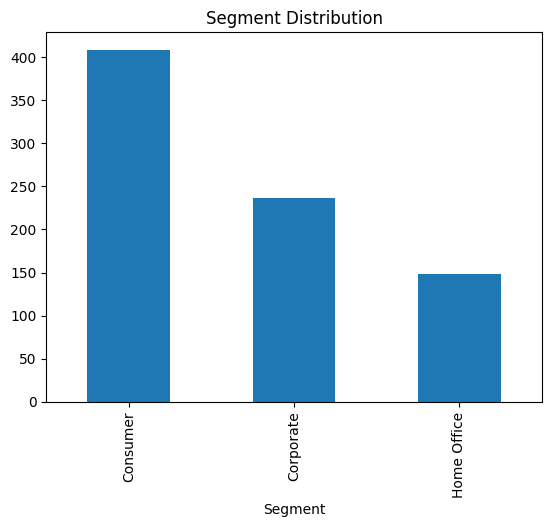

In [26]:
dataset['Segment'].value_counts().plot(kind='bar', title='Segment Distribution')
plt.show()


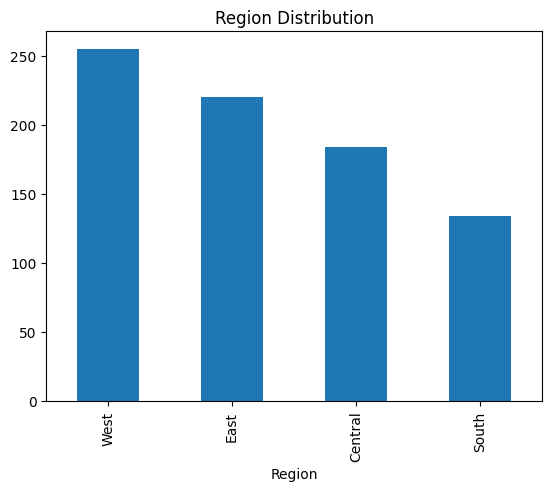

In [27]:
dataset['Region'].value_counts().plot(kind='bar', title='Region Distribution')
plt.show()

Support Vector Regression Model - Version 1

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8267)

In [30]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

predictions_svr = svr.predict(x_test)


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse_value_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)
rmse_svr = np.sqrt(mse_value_svr)
mean_abs_svr = mean_absolute_error(y_test, predictions_svr)

In [34]:
print("Support Vector Regression Model - Results:\n")
print(f"R-squared: {r2_svr:.2f}")
print(f"Mean Squared Error: {mse_value_svr:.2f}")
print(f"Root Mean Squared Error: {rmse_svr:.2f}")
print(f"Mean Absolute Error: {mean_abs_svr:.2f}")

Support Vector Regression Model - Results:

R-squared: -3761.50
Mean Squared Error: 932954.44
Root Mean Squared Error: 965.90
Mean Absolute Error: 797.92
